# Daria Bromot - FS500047

## Support Vector Machines Project 

### The Data

Here's a picture of the three different Iris types:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_theme()
%matplotlib inline

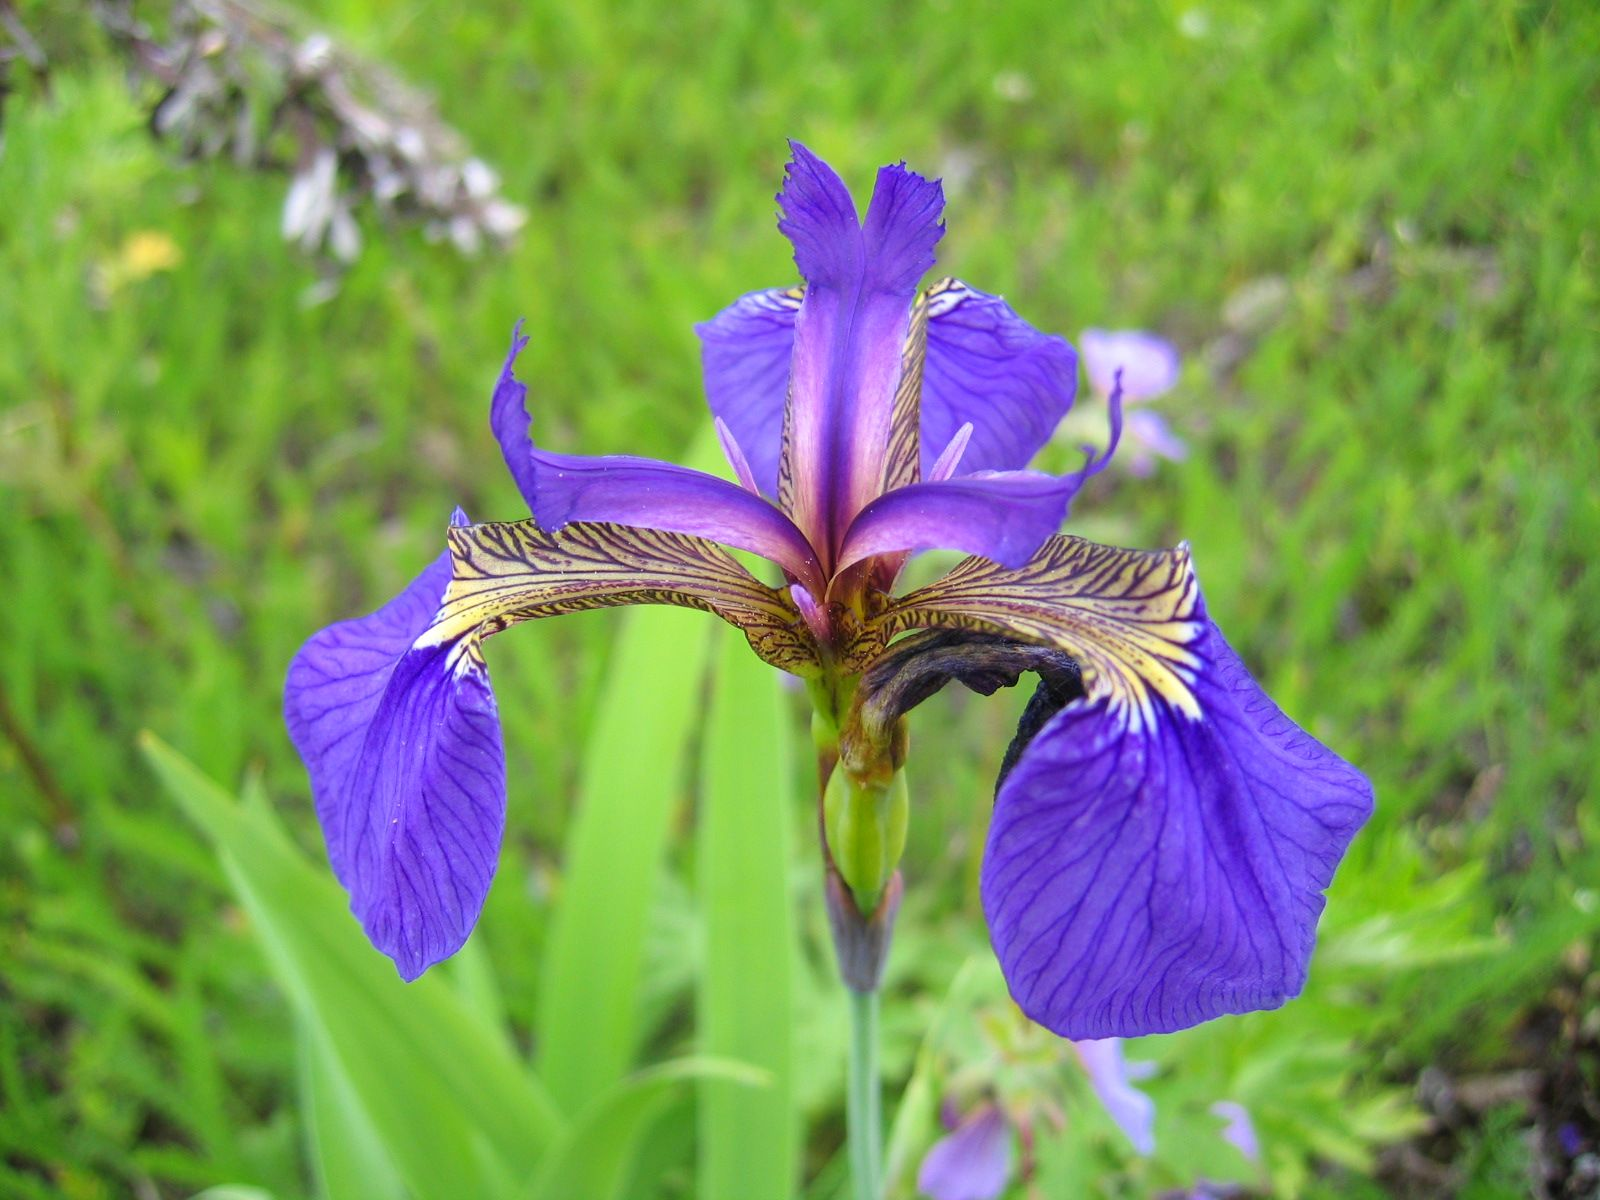

In [9]:
# The Iris Setosa
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg'
Image(url,width=300, height=300)

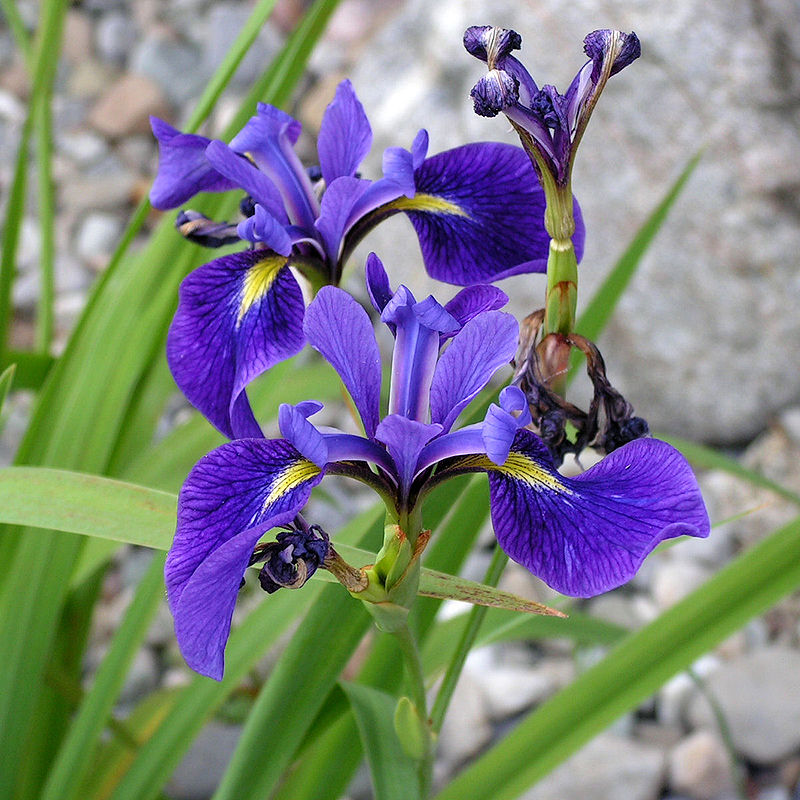

In [6]:
# The Iris Versicolor
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/800px-Blue_Flag%2C_Ottawa.jpg'
Image(url,width=300, height=300)

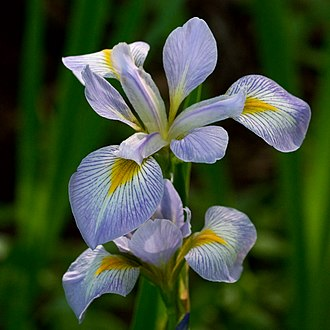

In [10]:
# The Iris Virginica
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/330px-Iris_virginica_2.jpg'
Image(url,width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

Use seaborn to get the iris data by using: iris = sns.load_dataset('iris')

In [15]:
iris = sns.load_dataset('iris') 

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's visualize the data and get you started!

## Exploratory Data Analysis

Create a pairplot of the data set. Which flower species seems to be the most separable?

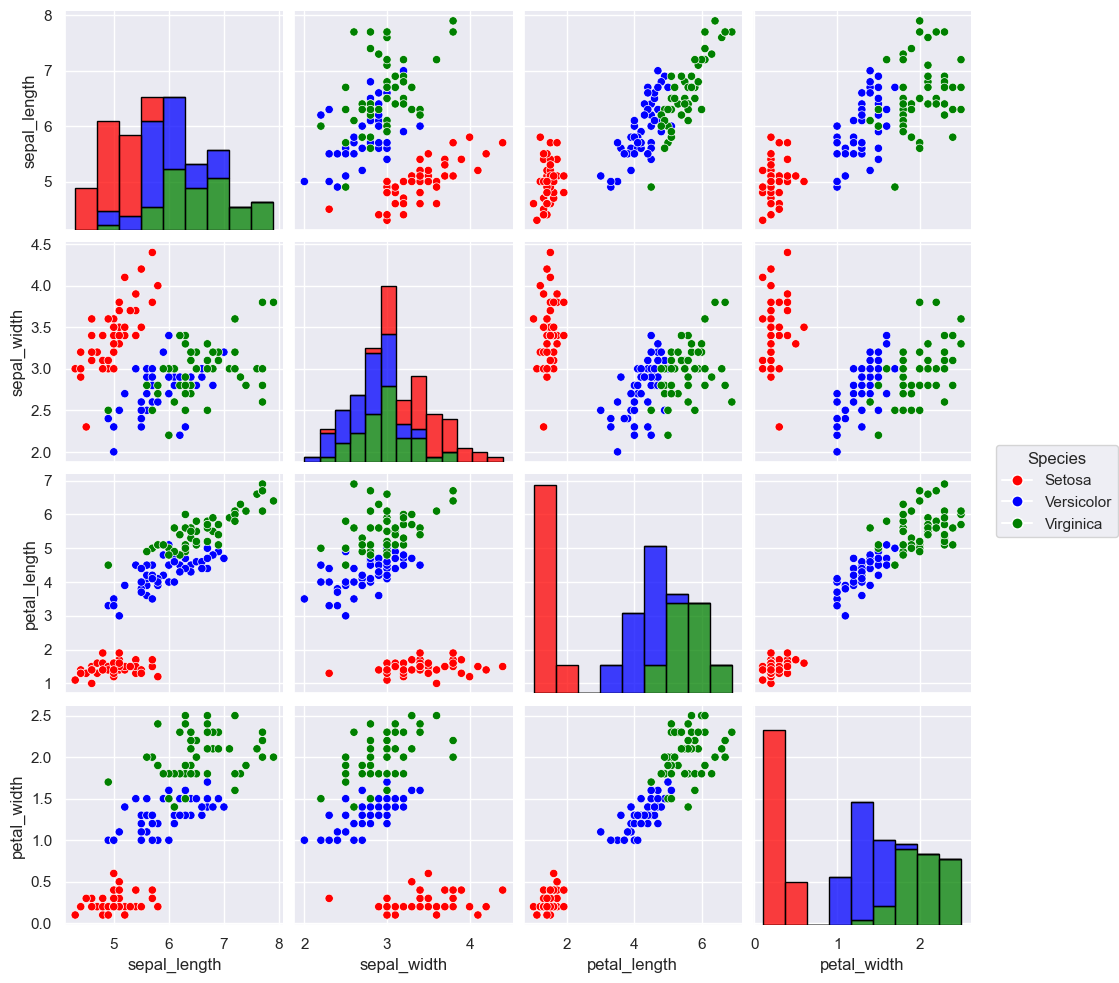

In [32]:
# Define custom colors for the plot
custom_palette = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Create the pairplot with custom settings
g = sns.pairplot(iris, hue='species', diag_kind='hist', diag_kws=dict(multiple="stack", edgecolor='black'),
                 palette=custom_palette)

# Customize the legend
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in custom_palette.values()]
g._legend.remove()
g.fig.legend(legend_handles, legend_labels, loc='center right', borderaxespad=0.1, title='Species')

# Display the plot
plt.show()


By observing the pairplot, we can determine that Setosa appears to be the most separable based on the degree of overlap or clustering of data points in the scatter plots. Setosa exhibit less overlap with other species and form distinct clusters in the scatter plots.

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

C:\Users\bromotdi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bromotdi\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

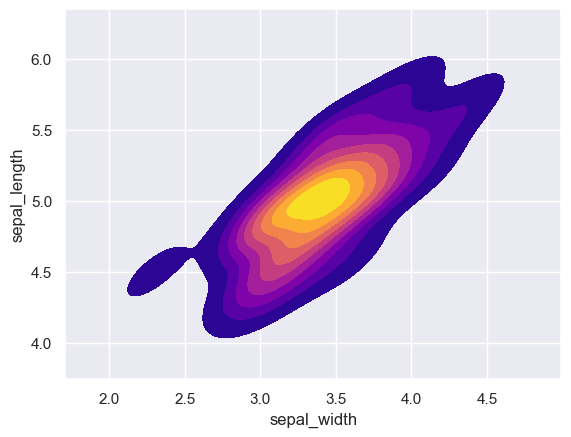

In [25]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

The shading in the plot represents the density of the data points. Areas with darker shading indicate higher density, while lighter areas indicate lower density.

In [29]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In the correlation matrix, each row and column represents a variable, and the values in the cells represent the correlation coefficients between the variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

Based on the correlation matrix we provided:

1. The sepal_length has a strong positive correlation with petal_length (0.871754) and petal_width (0.817941). This suggests that as sepal_length increases, there is a tendency for petal_length and petal_width to increase as well.

2. The sepal_width has a weak negative correlation with petal_length (-0.428440) and petal_width (-0.366126). This indicates that as sepal_width increases, there is a slight tendency for petal_length and petal_width to decrease.

3. The petal_length has a strong positive correlation with sepal_length (0.871754) and petal_width (0.962865). This suggests that as petal_length increases, there is a tendency for sepal_length and petal_width to increase as well.

4. The petal_width has a strong positive correlation with sepal_length (0.817941) and petal_length (0.962865). This indicates that as petal_width increases, there is a tendency for sepal_length and petal_length to increase as well.

Text(0.5, 1.0, 'iris.corr()')

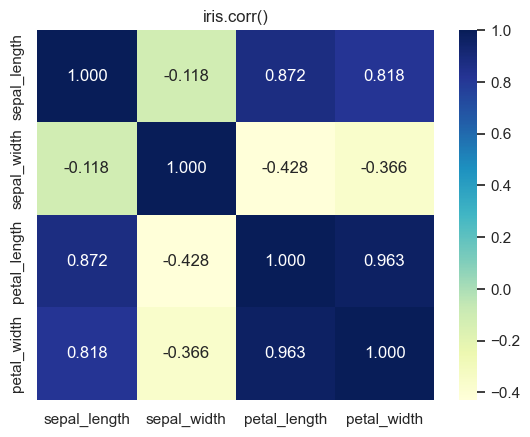

In [28]:
sns.heatmap(iris.corr(),cmap='YlGnBu', annot=True, fmt='.3f')
plt.title('iris.corr()')

# Train Test Split

** Split your data into a training set and a testing set.**

In [45]:
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Fit the model to the training data
svm_classifier.fit(X_train, y_train)

SVC()

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [47]:
y_pred = svm_classifier.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [52]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [53]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

**Create a GridSearchCV object and fit it to the training data.**

In [58]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid,verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             verbose=2)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set using the best estimator from grid search
y_pred = grid_search.best_estimator_.predict(X_test)

# Create a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


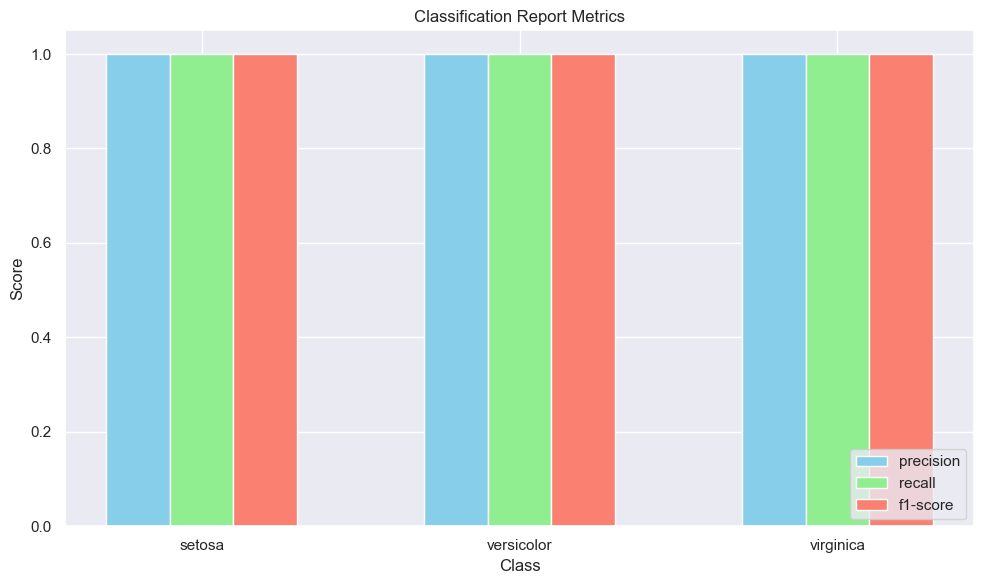

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the precision, recall, and F1-score from the classification report
report_data = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report_data.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
scores = np.array([[report_data[class_name][metric] for metric in metrics] for class_name in class_names])

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.2
colors = ['skyblue', 'lightgreen', 'salmon']

for i, metric in enumerate(metrics):
    ax.bar(x + (i-1) * width, scores[:, i], width, label=metric, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Comparing of Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine

C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


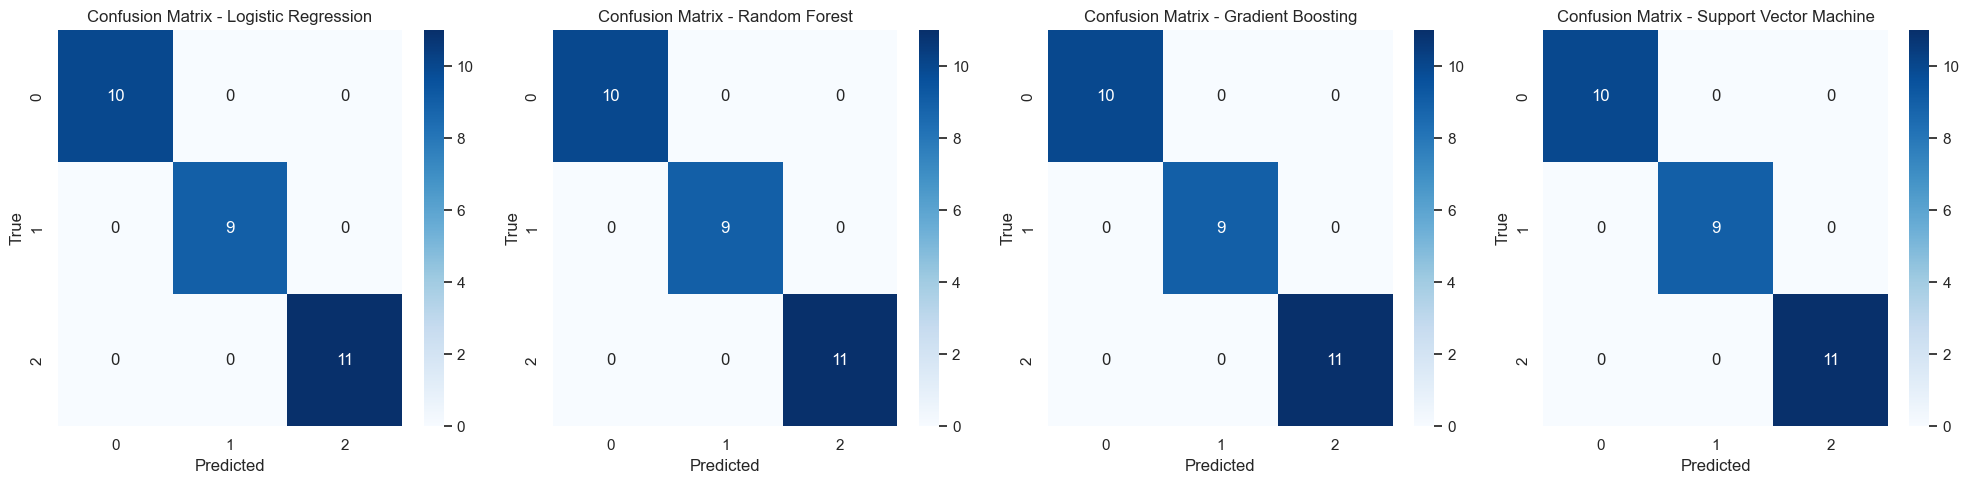

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Classification Report - Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        1

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[clf_name] = {'classification_report': classification_rep, 'confusion_matrix': confusion_mat}

# Plot the confusion matrices
plt.figure(figsize=(20, 5))
for i, (clf_name, result) in enumerate(results.items()):
    plt.subplot(1, len(classifiers), i+1)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {clf_name}")

plt.tight_layout()
plt.show()

# Plot the classification reports
for clf_name, result in results.items():
    print(f"Classification Report - {clf_name}:")
    print(result['classification_report'])
    print('\n')


C:\Users\bromotdi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bromotdi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


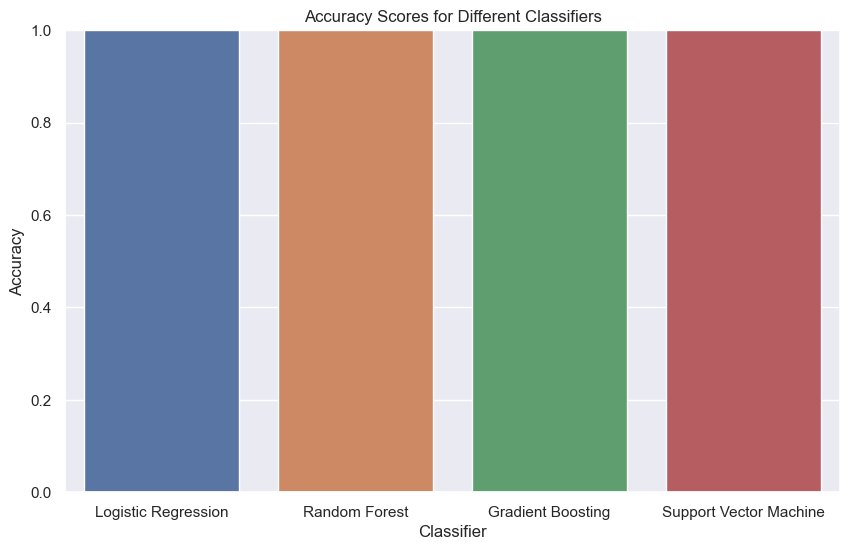

Accuracy Score - Logistic Regression: 1.0


Accuracy Score - Random Forest: 1.0


Accuracy Score - Gradient Boosting: 1.0


Accuracy Score - Support Vector Machine: 1.0




In [66]:
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = {'classification_report': classification_rep, 'confusion_matrix': confusion_mat, 'accuracy': accuracy}

# Plot the accuracy scores
accuracy_scores = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(list(classifiers.keys()), accuracy_scores)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Different Classifiers")
plt.ylim([0, 1])
plt.show()

# Print the accuracy scores
for clf_name, result in results.items():
    print(f"Accuracy Score - {clf_name}: {result['accuracy']}")
    print('\n')


Nice to see results like this. Well, here we can only say that on a professional dataset, all models work perfectly. Dataset saves everything. If we took a more real dataset, adventures and surprises would begin there :)